## PUI 2016 HOMEWORK 8
#### Ian Wright, iw453
#### November 2016

# Working with Data - Computer Lab for Guest Lecture Julia Lane

In this computer lab we will learn more more details and practice data work to enhance the content of the lecture presented by Julia Lane on responsible data use. We will address a research question, think about data and measurement errors, and manipulate data. 

OUTLINE: 
1. Define a research question 
2. Think about what data are available 
3. Think about possible measurement errors 
4. Think about the interpretation of your results 
5. Inform your results by linking datasets 

# 1. Define a reserach question
Which Community Districts in NYC show the highest number of complaints?

# 2. Think about what data are available
Find suitable data by searching the CUSP Data Catalog https://datahub.cusp.nyu.edu/catalog. You can use Urban Profiler to investigate the Metadata associated with each dataset. Using this tool will help you to decide which attributes of the data you need to answer your question so you don't have to load the entire dataset. 

In [226]:
import os
import pandas as pd
import numpy as np
import re
import matplotlib as plt
plt.style.use('ggplot')
%pylab inline
PUIdata = os.getenv('PUIDATA')
print PUIdata

Populating the interactive namespace from numpy and matplotlib
/Users/ian/school/hw/PUI2016/PUIDATA


In [151]:
# Load dataset
df = pd.read_csv(PUIdata + "/311_Service_Requests_from_2010_to_Present.csv" , usecols=[0, 5, 21, 23, 24])
df.columns
# 'https://data.cityofnewyork.us/resource/erm2-nwe9.csv'

Index([u'Unique Key', u'Complaint Type', u'Resolution Description',
       u'Community Board', u'Borough'],
      dtype='object')

In [152]:
df.head()

,Unique Key,Complaint Type,Resolution Description,Community Board,Borough
0,34212771,Noise - Residential,The Police Department responded to the complai...,13 QUEENS,QUEENS
1,34212392,Blocked Driveway,The Police Department reviewed your complaint ...,12 BRONX,BRONX
2,34214520,Blocked Driveway,The Police Department responded and upon arriv...,03 QUEENS,QUEENS
3,34212483,Blocked Driveway,The Police Department issued a summons in resp...,12 BRONX,BRONX
4,34214231,Street Condition,The Department of Transportation inspected thi...,12 MANHATTAN,MANHATTAN


# 3. Think about possible measurement errors
Do you see any problems regarding possible measurement error? Think about who is represented in the data, ommissions, duplications, content error, missing data, etc. 

In [153]:
# Check if all Boroughs and Community Districts are represented in the Data 
print df['Borough'].unique()
print df['Community Board'].unique()

['QUEENS' 'BRONX' 'MANHATTAN' 'BROOKLYN' 'Unspecified' 'STATEN ISLAND']
['13 QUEENS' '12 BRONX' '03 QUEENS' '12 MANHATTAN' '09 MANHATTAN'
 '08 QUEENS' '01 QUEENS' '07 BRONX' '01 BROOKLYN' '03 MANHATTAN'
 '09 QUEENS' '05 BRONX' '03 BROOKLYN' '07 MANHATTAN' '12 BROOKLYN'
 '0 Unspecified' '09 BROOKLYN' '07 QUEENS' '15 BROOKLYN' '08 MANHATTAN'
 '10 BROOKLYN' '08 BROOKLYN' '04 MANHATTAN' '02 MANHATTAN' '12 QUEENS'
 '04 BRONX' '04 BROOKLYN' '01 BRONX' 'Unspecified MANHATTAN' '10 QUEENS'
 '18 BROOKLYN' '11 BROOKLYN' '10 MANHATTAN' '11 QUEENS' '16 BROOKLYN'
 '05 BROOKLYN' '05 MANHATTAN' '55 BROOKLYN' '08 BRONX' '09 BRONX'
 '17 BROOKLYN' '01 MANHATTAN' '05 QUEENS' '06 QUEENS' '02 BRONX' '11 BRONX'
 '04 QUEENS' 'Unspecified BROOKLYN' '02 QUEENS' '01 STATEN ISLAND'
 '03 STATEN ISLAND' '14 BROOKLYN' '07 BROOKLYN' '02 STATEN ISLAND'
 '10 BRONX' '11 MANHATTAN' '06 BROOKLYN' '13 BROOKLYN' '06 MANHATTAN'
 'Unspecified BRONX' '02 BROOKLYN' '06 BRONX' '14 QUEENS' '03 BRONX'
 '83 QUEENS' 'Unspecified QUE

In [155]:
# How many unique values do we have? 
print len(df['Borough'].unique()), 'boroughs'
print len(df['Community Board'].unique()), 'community districts'

6 boroughs
74 community districts


In [8]:
# Why do we have so many? Some of them are unspecified, missing. Some might be invalid entries. 
# We should have 59 Community Districts.

Looks like we have some garbage values in both the 'Borough' and 'Community Board' coloumns. Garbage values seem to have the string 'Unspecified' in them.

In [156]:
print len(df[~df['Borough'].str.contains('Unspecified')]['Borough'].unique()), 'boroughs'
print len(df[~df['Community Board'].str.contains('Unspecified')]['Community Board'].unique()), 'community districts'

5 boroughs
68 community districts


In [161]:
# still too many community districts here...

# manhattan should go up to 12
# brooklyn should go up to 18
# queens should go up to 14
# bronx should go up to 12
# staten should go up to 3
np.sort(df[~df['Community Board'].str.contains('Unspecified')]['Community Board'].unique())

array(['01 BRONX', '01 BROOKLYN', '01 MANHATTAN', '01 QUEENS',
       '01 STATEN ISLAND', '02 BRONX', '02 BROOKLYN', '02 MANHATTAN',
       '02 QUEENS', '02 STATEN ISLAND', '03 BRONX', '03 BROOKLYN',
       '03 MANHATTAN', '03 QUEENS', '03 STATEN ISLAND', '04 BRONX',
       '04 BROOKLYN', '04 MANHATTAN', '04 QUEENS', '05 BRONX',
       '05 BROOKLYN', '05 MANHATTAN', '05 QUEENS', '06 BRONX',
       '06 BROOKLYN', '06 MANHATTAN', '06 QUEENS', '07 BRONX',
       '07 BROOKLYN', '07 MANHATTAN', '07 QUEENS', '08 BRONX',
       '08 BROOKLYN', '08 MANHATTAN', '08 QUEENS', '09 BRONX',
       '09 BROOKLYN', '09 MANHATTAN', '09 QUEENS', '10 BRONX',
       '10 BROOKLYN', '10 MANHATTAN', '10 QUEENS', '11 BRONX',
       '11 BROOKLYN', '11 MANHATTAN', '11 QUEENS', '12 BRONX',
       '12 BROOKLYN', '12 MANHATTAN', '12 QUEENS', '13 BROOKLYN',
       '13 QUEENS', '14 BROOKLYN', '14 QUEENS', '15 BROOKLYN',
       '16 BROOKLYN', '17 BROOKLYN', '18 BROOKLYN', '26 BRONX', '27 BRONX',
       '55 BROOKLYN', '

In [174]:
bad_districts = ['64 MANHATTAN', '55 BROOKLYN', '80 QUEENS', '81 QUEENS',
                 '82 QUEENS', '83 QUEENS', '26 BRONX', '27 BRONX', '95 STATEN ISLAND']

In [164]:
# Check for duplicates? Are these plausible?
df.duplicated().sum()

0

No duplicate records.

In [165]:
# What about missing values? Can you detect any patterns? 
# count the null/NA values in 'Resolution Description' column
df['Resolution Description'].isnull().sum()

1807

In [166]:
# Data Editing: Is it possible to replace missing values? Is it possible to use Complaint Type 
# to fill missings in Resolution Descriptor?
df.ix[df['Resolution Description'].isnull(), 'Resolution Description'] = \
df.ix[df['Resolution Description'].isnull(), 'Complaint Type']

In [167]:
# check again for NULL/NA in 'Resolution Description' column
df['Resolution Description'].isnull().sum()

0

In [ ]:
# Generate marker for unplausible Community Districts
# How do these districts look like? 

See above re: 'Unspecified' strings, and community districts with numbers out of reasonable range ("bad districts")

In [175]:
# Drop the marked districts
df.drop(df[df['Borough'].str.contains('Unspecified')].index, axis=0, inplace=True)
df.drop(df[df['Community Board'].str.contains('Unspecified')].index, axis=0, inplace=True)
df.drop(df[map(lambda comm: comm in bad_districts, df['Community Board'])].index, axis=0, inplace=True)

In [176]:
# Produce your result: Generate an indicator which ranks the Community District by complaint numbers 
# on the Community district level
comm_df = pd.DataFrame(df.groupby(df['Community Board']).count().loc[:, 'Unique Key'])
comm_df.columns = ['complaint_count']
comm_df = comm_df.sort_values('complaint_count')
comm_df.head()

,complaint_count
Community Board,
02 BRONX,219
13 BROOKLYN,261
01 BRONX,280
06 QUEENS,289
03 BRONX,294


In [ ]:
# Safe reduced data frame (Community District level)

(above)

# 4. Think about the interpretation of your results?
What do you have to keep in mind when interpreting your results? Are they generable? Does the way the data is collected influence your results? To better inform city agancies it might be good to explore in more detail the underlying dempgraphics/infrastructure of a Community District becasue this might influence 311 calls. You can do this by merging external data on the Community District level to your analysis data. 

In [128]:
# Population by Community District
df_pop = pd.read_csv(PUIdata + "/Final_Demographics.csv")

In [129]:
# Check variables in file
df_pop.columns

Index([u'FIPS', u'cd_id', u'Total Population',
       u'Population Density (per sq. mile)', u'% Total Population: Male',
       u'% Total Population: 18 to 24 Years',
       u'% Total Population: 25 to 34 Years',
       u'% Total Population: 35 to 44 Years',
       u'% Population 5 Years And Over: Speak Only English',
       u'% Population 5 Years And Over: Spanish or Spanish Creole',
       ...
       u'Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Production occupations',
       u'Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Transportation and material moving occupations',
       u'% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations',
       u'% Employed Civilian Population 16 Years And Over: Service occupations',
       u'% Employed Civilian Population 16 Years And Over: Sales and office occupations',
       

In [130]:
# How many community districts are in file? 
print len(df_pop['cd_id'].unique()), 'community districts'

59 community districts


In [131]:
# Manipulate data to get some information on demographics by Community District. 
# Think about who might be more likely to call 311
pop_cols = [col for col in df_pop.columns if 'Total Population:' in col]
pop_cols.append('cd_id')
print pop_cols

['% Total Population: Male', '% Total Population: 18 to 24 Years', '% Total Population: 25 to 34 Years', '% Total Population: 35 to 44 Years', 'cd_id']


In [132]:
# Save data frame
df_pop = df_pop.loc[:, pop_cols]

In [133]:
# add a column for population of age 45+
df_pop['% Total Population: 17- or 45+ Years'] = 100 - df_pop['% Total Population: 18 to 24 Years'] \
 - df_pop['% Total Population: 25 to 34 Years']  - df_pop['% Total Population: 35 to 44 Years']
df_pop.head()

,% Total Population: Male,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,cd_id,% Total Population: 17- or 45+ Years
0,46.65,10.73,15.04,11.32,BX08,62.91
1,46.35,11.35,14.29,12.57,BX12,61.79
2,45.20,8.62,13.74,12.78,BX10,64.86
3,50.09,8.10,17.43,14.09,BX11,60.38
4,44.72,14.24,14.89,12.38,BX03,58.49


In [134]:
df_pop.drop('% Total Population: Male', axis=1, inplace=True)
df_pop.head()

,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,cd_id,% Total Population: 17- or 45+ Years
0,10.73,15.04,11.32,BX08,62.91
1,11.35,14.29,12.57,BX12,61.79
2,8.62,13.74,12.78,BX10,64.86
3,8.10,17.43,14.09,BX11,60.38
4,14.24,14.89,12.38,BX03,58.49


In [199]:
df_pop.cd_id.unique()

array(['BX08', 'BX12', 'BX10', 'BX11', 'BX03', 'BX06', 'BX07', 'BX05',
       'BX04', 'BX09', 'BX01', 'BX02', 'MN12', 'MN09', 'MN10', 'MN11111',
       'MN08', 'MN07', 'MN05', 'MN04', 'MN06', 'MN03', 'MN01', 'MN02',
       'SI03', 'SI02', 'SI01', 'BK01', 'BK04', 'BK03', 'BK02', 'BK06',
       'BK08', 'BK16', 'BK05', 'BK18', 'BK17', 'BK09', 'BK07', 'BK10',
       'BK12', 'BK14', 'BK15', 'BK11', 'BK13', 'QN01', 'QN03', 'QN07',
       'QN11', 'QN13', 'QN08', 'QN04', 'QN06', 'QN02', 'QN05', 'QN09',
       'QN12', 'QN10', 'QN14'], dtype=object)

In [143]:
# Infrastructure by Community District
df_infr = pd.read_csv(PUIdata + "/ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv")

In [144]:
# Check variables in file
df_infr.columns

Index([u'FIPS', u'Geographic Identifier', u'Qualifying Name', u'Households',
       u'Households: With An Internet Subscription',
       u'Households: Dial-Up Alone', u'Households: Dsl',
       u'Households: With Mobile Broadband',
       u'Households: Without Mobile Broadband', u'Households: Cable Modem',
       u'Households: With Mobile Broadband.1',
       u'Households: Without Mobile Broadband.1', u'Households: Fiber-Optic',
       u'Households: With Mobile Broadband.2',
       u'Households: Without Mobile Broadband.2',
       u'Households: Satellite Internet Service',
       u'Households: With Mobile Broadband.3',
       u'Households: Without Mobile Broadband.3',
       u'Households: Two or More Fixed Broadband Types, or Other',
       u'Households: With Mobile Broadband.4',
       u'Households: Without Mobile Broadband.4',
       u'Households: Mobile Broadband Alone or With Dialup',
       u'Households: Internet Access Without A Subscription',
       u'Households: No Internet Acc

In [145]:
# How many community districts are in file? 
print len(df_infr['Qualifying Name'].unique()), 'community districts'
print len(df_infr), 'rows'

55 community districts
59 rows


In [146]:
# which districts have twin records?
df_infr['Qualifying Name']

0     NYC-Bronx Community District 8--Riverdale, New...
1     NYC-Bronx Community District 12--Wakefield, Ne...
2     NYC-Bronx Community District 10--Co-op City, N...
3     NYC-Bronx Community District 11--Pelham Parkwa...
4     NYC-Bronx Community District 3 & 6--Belmont, N...
5     NYC-Bronx Community District 3 & 6--Belmont, N...
6     NYC-Bronx Community District 7--Bedford Park, ...
7     NYC-Bronx Community District 5--Morris Heights...
8     NYC-Bronx Community District 4--Concourse, New...
9     NYC-Bronx Community District 9--Castle Hill, N...
10    NYC-Bronx Community District 1 & 2--Hunts Poin...
11    NYC-Bronx Community District 1 & 2--Hunts Poin...
12    NYC-Manhattan Community District 12--Washingto...
13    NYC-Manhattan Community District 9--Hamilton H...
14    NYC-Manhattan Community District 10--Central H...
15    NYC-Manhattan Community District 11--East Harl...
16    NYC-Manhattan Community District 8--Upper East...
17    NYC-Manhattan Community District 7--Upper 

In [147]:
# manual override for the twinned records
# because we're going to convert values to '% of total', we don't need to worry about double counting populations
df_infr.loc[4, 'Qualifying Name'] = 'NYC-Bronx Community District 3--Belmont, New York'
df_infr.loc[5, 'Qualifying Name'] = 'NYC-Bronx Community District 6--Belmont, New York'
df_infr.loc[10, 'Qualifying Name'] = 'NYC-Bronx Community District 1--Hunts Point, New York'
df_infr.loc[11, 'Qualifying Name'] = 'NYC-Bronx Community District 2--Hunts Point, New York'
df_infr.loc[18, 'Qualifying Name'] = 'NYC-Manhattan Community District 4--Chelsea, New York'
df_infr.loc[19, 'Qualifying Name'] = 'NYC-Manhattan Community District 5--Chelsea, New York'
df_infr.loc[22, 'Qualifying Name'] = 'NYC-Manhattan Community District 1--Battery Park City, New York'
df_infr.loc[23, 'Qualifying Name'] = 'NYC-Manhattan Community District 2--Battery Park City, New York'

In [148]:
# Manipulate data to get some information on internet/broadband useage by Community District
# Aggregate the mobile subscription data
df_infr['%_mobile'] = map(lambda mobile, mobile1, mobile2, mobile3, mobile4, total:
                          float(mobile + mobile1 + mobile2 + mobile3 + mobile4) / float(total),
                          df_infr['Households: With Mobile Broadband'],
                          df_infr['Households: With Mobile Broadband.1'],
                          df_infr['Households: With Mobile Broadband.2'],
                          df_infr['Households: With Mobile Broadband.3'],
                          df_infr['Households: With Mobile Broadband.4'],
                          df_infr['Households'])

In [149]:
# Aggregate internet type by high and low connections
df_infr['%_highspeed'] = map(lambda broadband, total:
                            float(broadband) / float(total),
                            df_infr['Households: With A Broadband Internet Subscription'],
                            df_infr['Households'])
df_infr['%_lowspeed'] = map(lambda dialup, total:
                            float(dialup) / float(total),
                            df_infr['Households: With Dial-Up Internet Subscription Alone'],
                            df_infr['Households'])

In [150]:
# Save data frame 
df_infr.drop([u'FIPS', u'Geographic Identifier', u'Households',
       u'Households: With An Internet Subscription',
       u'Households: Dial-Up Alone', u'Households: Dsl',
       u'Households: With Mobile Broadband',
       u'Households: Without Mobile Broadband', u'Households: Cable Modem',
       u'Households: With Mobile Broadband.1',
       u'Households: Without Mobile Broadband.1', u'Households: Fiber-Optic',
       u'Households: With Mobile Broadband.2',
       u'Households: Without Mobile Broadband.2',
       u'Households: Satellite Internet Service',
       u'Households: With Mobile Broadband.3',
       u'Households: Without Mobile Broadband.3',
       u'Households: Two or More Fixed Broadband Types, or Other',
       u'Households: With Mobile Broadband.4',
       u'Households: Without Mobile Broadband.4',
       u'Households: Mobile Broadband Alone or With Dialup',
       u'Households: Internet Access Without A Subscription',
       u'Households: No Internet Access',
       u'% Households: With An Internet Subscription', u'Households.1',
       u'Households: Has A Computer',
       u'Households: With Dial-Up Internet Subscription Alone',
       u'Households: With A Broadband Internet Subscription',
       u'Households: Without An Internet Subscription',
       u'Households: No Computer'], axis=1, inplace=True)
df_infr.head()

,Qualifying Name,%_mobile,%_highspeed,%_lowspeed
0,"NYC-Bronx Community District 8--Riverdale, New...",0.365386,0.736125,0.009611
1,"NYC-Bronx Community District 12--Wakefield, Ne...",0.233906,0.701205,0.003971
2,"NYC-Bronx Community District 10--Co-op City, N...",0.242827,0.687205,0.003358
3,NYC-Bronx Community District 11--Pelham Parkwa...,0.239259,0.696274,0.002716
4,"NYC-Bronx Community District 3--Belmont, New York",0.259000,0.580443,0.001529


# 5. Inform your results by linking datasets
Now you want to link the three data frames to produce summary statistics for Community Districts which show a high number of complaints vs. Community Districts which show a lower number of complaints. Please keep in mind that the identifiers used for the linkage (Community Dostrict IDs) should be recored the same way. Use regular expressions to harmonize the identifiers if possible. The identifiers should look like BK01, BK02, etc.
https://docs.python.org/2/library/re.html

In [201]:
# normalizing function for community districts
def map_cd(raw_cd):
    
    # first, extract the digit from the string, and append a '0' if necessary
    cd_num = re.findall(r'\d+', raw_cd)[0]
    if len(cd_num) == 1:
        cd_num = '0' + cd_num
    else:
        pass
    
    # now, append the correct borough
    if 'bronx' in raw_cd.lower():
        return 'BX' + cd_num
    elif 'brooklyn' in raw_cd.lower():
        return 'BK' + cd_num
    elif 'manhattan' in raw_cd.lower():
        return 'MN' + cd_num
    elif 'queens' in raw_cd.lower():
        return 'QN' + cd_num
    else:
        return 'SI' + cd_num

In [209]:
# Harmonize identifier of dataframe 1
comm_df['cd_id'] = map(lambda cd: map_cd(cd), comm_df.index)
comm_df.head()

,complaint_count,cd_id
Community Board,,
02 BRONX,219,BX02
13 BROOKLYN,261,BK13
01 BRONX,280,BX01
06 QUEENS,289,QN06
03 BRONX,294,BX03


In [ ]:
# Harmonize identifier of dataframe 2

df_pop already formatted correctly

In [210]:
# Harmonize identifier of dataframe 3
df_infr['cd_id'] = map(lambda cd: map_cd(cd), df_infr['Qualifying Name'])
df_infr.drop('Qualifying Name', axis=1, inplace=True)
df_infr.head()

,%_mobile,%_highspeed,%_lowspeed,cd_id
0,0.365386,0.736125,0.009611,BX08
1,0.233906,0.701205,0.003971,BX12
2,0.242827,0.687205,0.003358,BX10
3,0.239259,0.696274,0.002716,BX11
4,0.259000,0.580443,0.001529,BX03


In [216]:
# Link the 3 dataframes
df = comm_df.merge(df_pop, how='left', on='cd_id').merge(df_infr, how='left', on='cd_id')
df.head()

,complaint_count,cd_id,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,% Total Population: 17- or 45+ Years,%_mobile,%_highspeed,%_lowspeed
0,219,BX02,12.76,18.26,12.04,56.94,0.287004,0.593167,0.000000
1,261,BK13,8.33,10.34,11.27,70.06,0.164167,0.611471,0.004238
2,280,BX01,12.76,18.26,12.04,56.94,0.287004,0.593167,0.000000
3,289,QN06,5.21,13.35,15.97,65.47,0.244125,0.806940,0.007859
4,294,BX03,14.24,14.89,12.38,58.49,0.259000,0.580443,0.001529


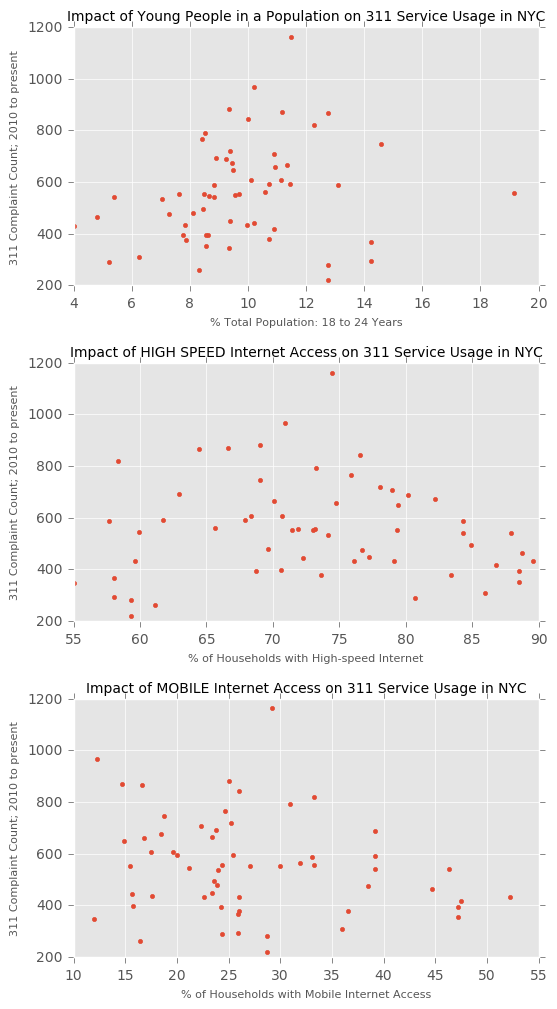

In [243]:
# Are the demographics and infrastructure different in Community Districts that show more complaints than others?
fig, axarr = plt.subplots(3)
fig.set_size_inches(6,12)
fig.subplots_adjust(hspace=.3)


axarr[0].plot(df['% Total Population: 18 to 24 Years'], df['complaint_count'], '.')
axarr[0].set_title('Impact of Young People in a Population on 311 Service Usage in NYC', fontsize=10)    
axarr[0].set_xlabel('% Total Population: 18 to 24 Years', fontsize=8)
axarr[0].set_ylabel('311 Complaint Count; 2010 to present', fontsize=8)

axarr[1].plot(df['%_highspeed'] * 100, df['complaint_count'], '.')
axarr[1].set_title('Impact of HIGH SPEED Internet Access on 311 Service Usage in NYC', fontsize=10)    
axarr[1].set_xlabel('% of Households with High-speed Internet', fontsize=8)
axarr[1].set_ylabel('311 Complaint Count; 2010 to present', fontsize=8)
    
axarr[2].plot(df['%_mobile'] * 100, df['complaint_count'], '.')
axarr[2].set_title('Impact of MOBILE Internet Access on 311 Service Usage in NYC', fontsize=10)    
axarr[2].set_xlabel('% of Households with Mobile Internet Access', fontsize=8)
axarr[2].set_ylabel('311 Complaint Count; 2010 to present', fontsize=8)
    
plt.show()

Some interesting results here. 
+ There seems to be a positive correlation between the portion of "young people" in a community district and the usage of the 311 service; districts with more young people have filed more 311 complaints. One would expect that the inverse is true as well - districts with an older demographic would be less active on 311. This pattern is likely due to demographics' *awareness* of the 311 service, and perhaps *level of comfort with technology*
+ For both HIGH SPEED and MOBILE internet access, it appears that districts in the bottom three quartiles of internet access all use 311 at approximately the same rate. Only in the upper quartile of internet access do we notice a trend: these districts are less inclined to use the service. It's likely that these districts are wealthier, and tend to rely on paid/private services to address the issues that may normally be addressed by a 311 service.